# Free response pilot

July 4, 2025

In [25]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

plt.rcParams.update({'font.size': 16})

In [27]:
data_dir = "../../../data/3pp/free-response/"

data = pd.read_csv(data_dir + "selection_trials.csv")
demographics = pd.read_csv(data_dir + "exit_survey.csv")

data["utt_length"] = data["written_label"].fillna("").apply(lambda x: len(str(x).split()))
data["prop_naive"] = data["n_naive"] / (data["n_naive"] + data["n_blue"])

data.head(10)

,subject_id,item_id,counterbalance,trial_num,n_blue,n_naive,goal,previous_selection,selected_tangram,selected_tangram_group,written_label,utt_length,prop_naive
0,67171fa93cd108b6c2b59e4e,0,a,0,0,4,refer,NaN,C,A,Laid back arms wide open,5,1.000000
1,67171fa93cd108b6c2b59e4e,0,a,1,2,4,refer,C,G,B,Looks like praying mantis,4,0.666667
2,67171fa93cd108b6c2b59e4e,0,a,2,1,1,social,G,E,B,Facing right 2 triangle head,5,0.500000
3,67171fa93cd108b6c2b59e4e,0,a,3,2,8,social,E,D,A,Facing left holding bucket,4,0.800000
4,67171fa93cd108b6c2b59e4e,0,a,4,3,8,refer,D,I,C,Kicking to right side,4,0.727273
5,67171fa93cd108b6c2b59e4e,0,a,5,3,8,social,I,H,B,No limbs,2,0.727273
6,67171fa93cd108b6c2b59e4e,0,a,6,2,0,refer,H,B,A,On knees arms outstretcched,4,0.000000
7,67171fa93cd108b6c2b59e4e,0,a,7,1,16,social,B,A,A,Facing right leg up in back,6,0.941176
8,67171fa93cd108b6c2b59e4e,0,a,8,2,1,social,A,J,C,Almost no limbs block body,5,0.333333
9,67171fa93cd108b6c2b59e4e,0,a,9,4,4,refer,J,K,C,Woman kneeling triangle on right hand,6,0.500000


In the test phase, participant see an audience (a number of blue group members + naive members) and a goal (refer or social). They have to select a tangram to talk about, and write out a label for that tangram. So this design allows us to test multiple predictions at once. The predictions:

1. Given a social goal, people choose the group A tangrams (the tangrams that just the blue group talks about), use shorter labels, and this doesn't really scale with the number of naive members of the audience
2. Given a refer goal to a mixed audience, participants choose equally between the different kinds of tangrams and use longer labels. (If they are just considering referential goals to a fully naive audience, then any long label for any tangram will work.)
3. Given a refer goal to a blue-group-only audience, participants choose the group A + B tangrams, and use shorter labels.
4. When there is even one naive member in the audience, there is a jump to the mixed-audience behavior (choosing uniformly between the tangrams, and using longer labels).

## Sanity checks

First, look at the distribution of tangrams across participants.

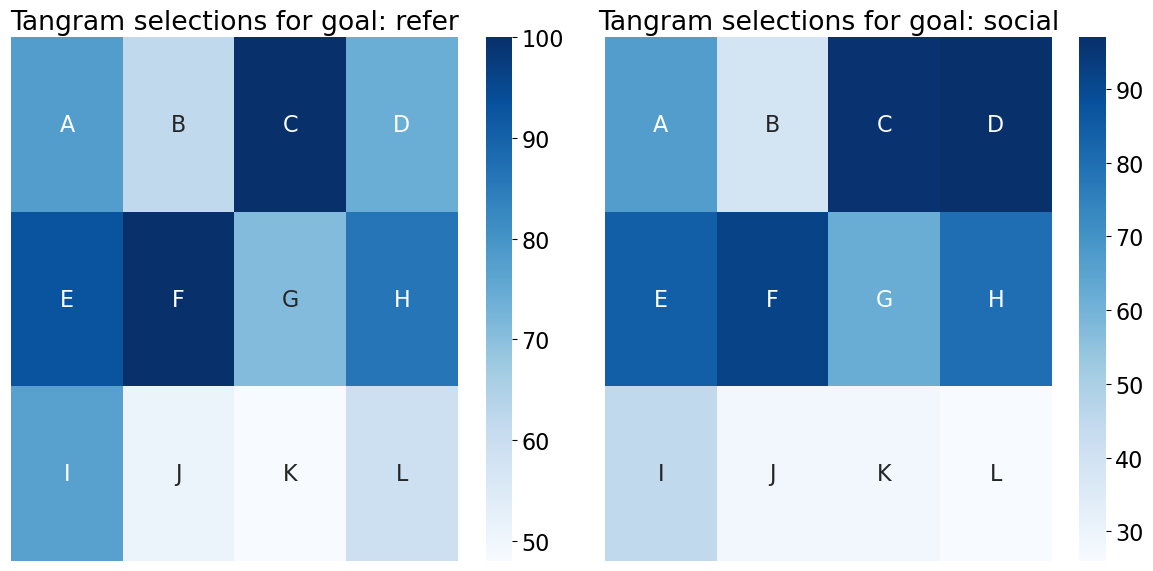

In [ ]:
# List of all tangram letters (adjust if your set is different)
tangram_letters = sorted(data['selected_tangram'].dropna().unique())

# For a 3x4 grid, reshape order as needed (example: alphabetical)
tangram_grid = np.array(tangram_letters).reshape(3, 4)

# Function to plot heatmap for a given goal
def plot_tangram_heatmap(goal, ax):
    counts = data[data['goal'] == goal]['selected_tangram'].value_counts()

    # Fill in missing tangrams with 0
    counts = counts.reindex(tangram_letters, fill_value=0)
    heatmap_data = counts.values.reshape(3, 4)
    
    sns.heatmap(heatmap_data, annot=tangram_grid, fmt='', cmap='Blues', cbar=True, ax=ax,
                xticklabels=False, yticklabels=False)
    ax.set_title(f"Tangram selections for goal: {goal}")

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plot_tangram_heatmap('refer', axes[0])
plot_tangram_heatmap('social', axes[1])
plt.tight_layout()
plt.show()

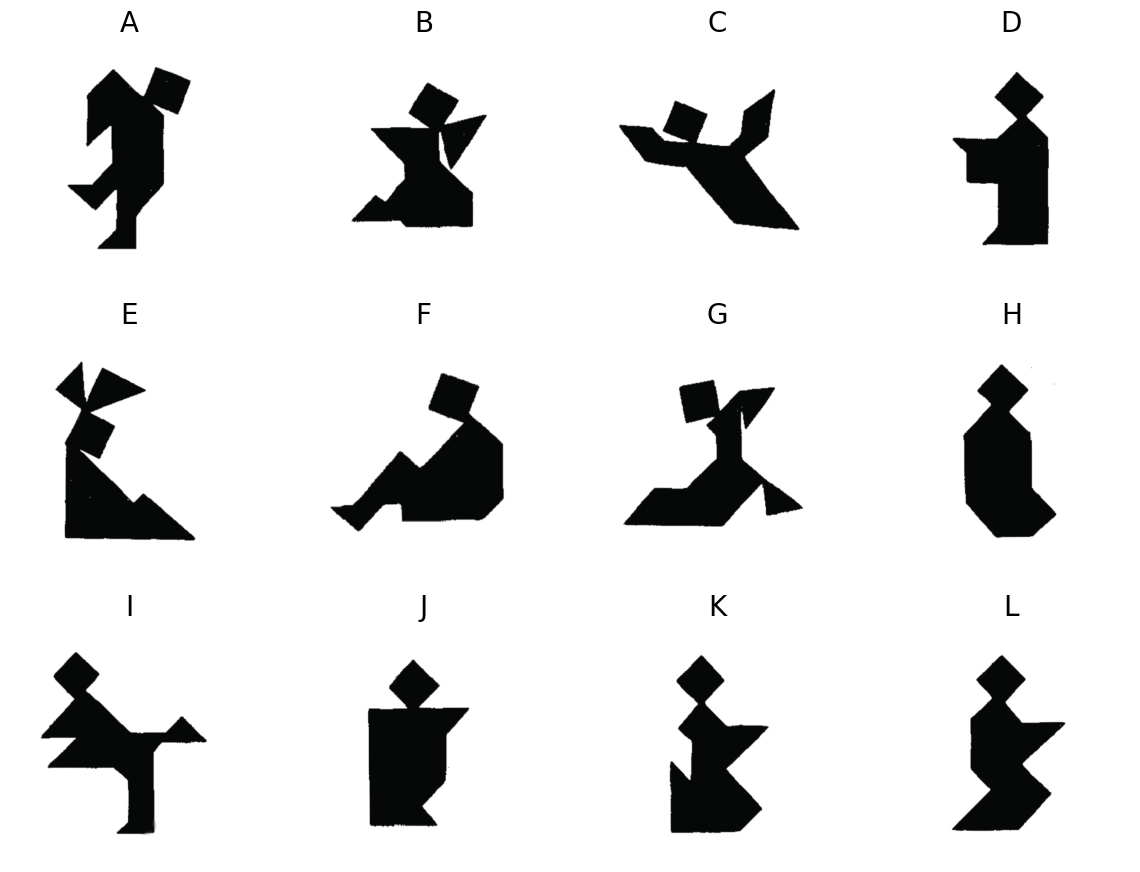

In [26]:
tangram_dir = "../../../experiments/3pp/free-response/stim/tangrams"
fig, axes = plt.subplots(3, 4, figsize=(12, 9))

for idx, letter in enumerate(tangram_letters):
    row, col = divmod(idx, 4)
    img_path = os.path.join(tangram_dir, f"tangram_{letter}.png")
    img = mpimg.imread(img_path)
    axes[row, col].imshow(img)
    axes[row, col].set_title(letter, fontsize=20)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()


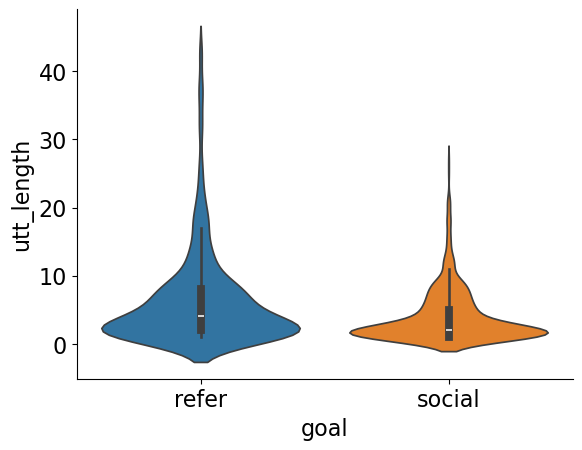

In [20]:
sns.violinplot(x="goal", y="utt_length", hue="goal", data=data)
sns.despine()

<Axes: xlabel='utt_length', ylabel='Density'>

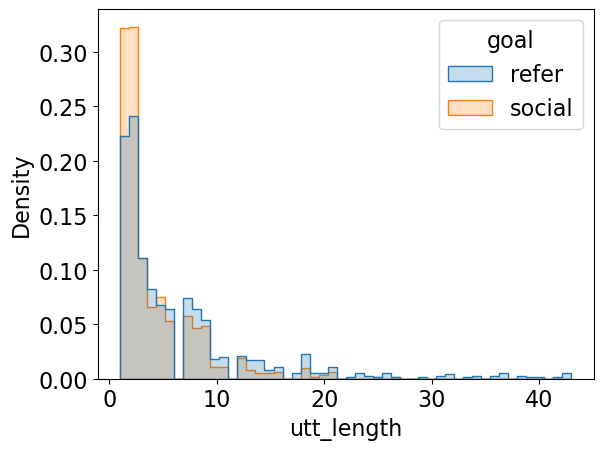

In [21]:
sns.histplot(data=data, x="utt_length", hue="goal", element="step", stat="density", common_norm=False)

## Interactions with audience

Plot proportion naive on x axis, goal is color, utt length y axis

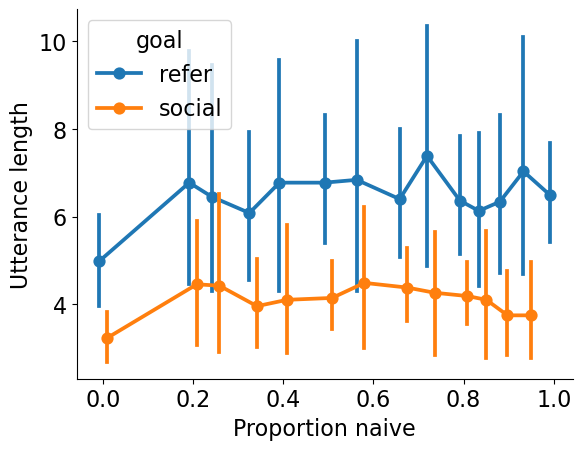

In [41]:
g = sns.pointplot(
    x="prop_naive", y="utt_length", hue="goal", data=data, native_scale=True, dodge=0.4
)
g.set_xlabel("Proportion naive")
g.set_ylabel("Utterance length")
sns.despine()

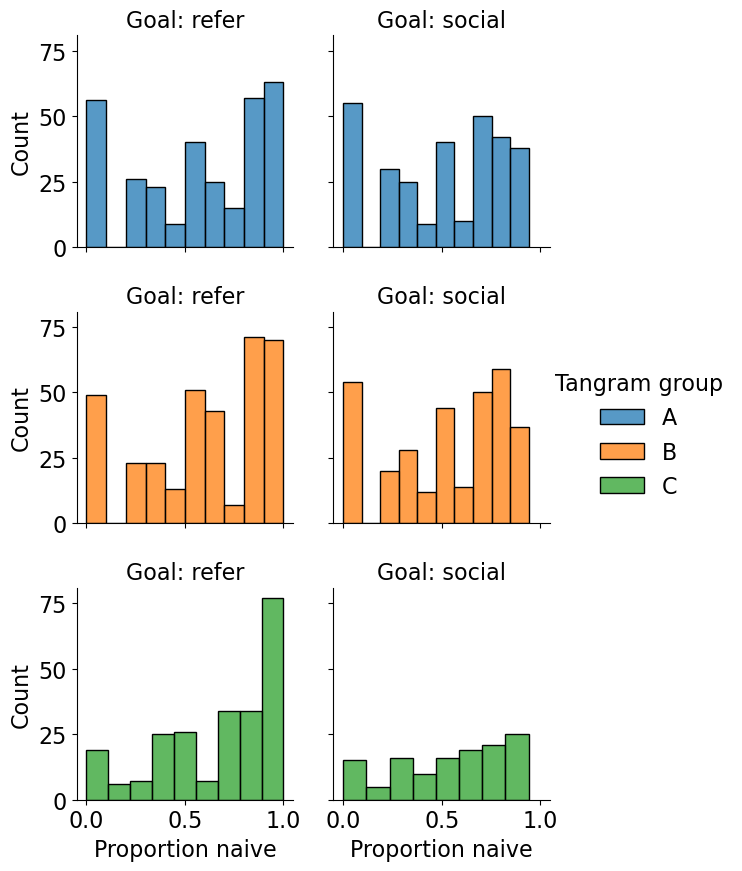

In [65]:
g = sns.FacetGrid(data, col="goal", row = "selected_tangram_group", hue="selected_tangram_group")
g.map_dataframe(sns.histplot, x="prop_naive",  multiple="stack")
g.set_axis_labels("Proportion naive", "Count")
g.set_titles("Goal: {col_name}")
g.add_legend(title="Tangram group")
plt.show()


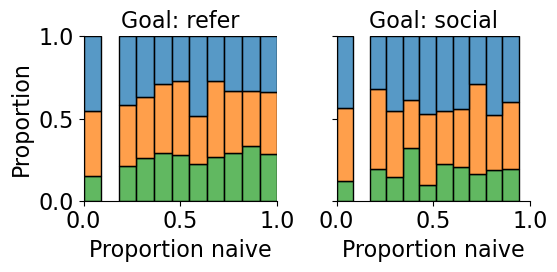

In [83]:
g = sns.FacetGrid(data, col="goal")
g.map_dataframe(sns.histplot, x="prop_naive", hue = "selected_tangram_group", multiple="fill", stat="probability")
g.set_axis_labels("Proportion naive", "Proportion")
g.set_titles("Goal: {col_name}")
plt.show()

In [ ]:
g = sns.FacetGrid(data, col="goal")
g.map_dataframe(
    sns.histplot,
    x="prop_naive",
    hue="selected_tangram_group",
    multiple="fill",           # normalize stacks per bin to sum to 1
    stat="probability",        # interpret heights as probabilities
    binrange=(0, 1)            # optional: fix range if all values are within [0, 1]
)
g.set_axis_labels("Proportion naive", "Proportion")
g.set_titles("Goal: {col_name}")
g.add_legend(title="Tangram group")
plt.show()